In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
#We will now import the dataset. Assume, the business organization currently wants us to analyse the dataset that contains their Day One
#transactions in Market_Basket_DayOneTransaction.csv file.
# So, let's import the file!

In [3]:
market_basket_df = pd.read_csv('/content/drive/MyDrive/Market_Basket_DayTwoTransactions.csv', header=None)
market_basket_df.head()
#market_basket_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,soup,butter,cider,rice,pet food,french fries,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole wheat rice,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pancakes,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,french fries,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chocolate,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#We will extract the items of each transaction in a list. Any NULL values are represented as NaN in pandas dataframe, so, we will exclude the "NaN"s in our list.

In [4]:
basket_items = []
for index, row in market_basket_df.iterrows():
   cleansed_items = [item for item in row if str(item)!='nan']
   basket_items.append(cleansed_items)
basket_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['soup', 'butter', 'cider', 'rice', 'pet food', 'french fries', 'green tea'],
 ['whole wheat rice', 'cooking oil'],
 ['pancakes', 'white wine'],
 ['french fries', 'yogurt cake'],
 ['chocolate', 'light mayo'],
 ['grated cheese', 'spaghetti', 'mineral water', 'pancakes'],
 ['burgers', 'black tea', 'bacon', 'muffins'],
 ['green tea'],
 ['chocolate', 'frozen smoothie', 'cookies'],
 ['shrimp', 'mineral water', 'brownies'],
 ['ground beef', 'olive oil', 'salmon', 'pancakes', 'eggs'],
 ['ground beef'],
 ['eggs', 'chocolate', 'green tea'],
 ['milk'],
 ['clothes accessories', 'cookies'],
 ['spaghetti', 'honey', 'low fat yogurt'],
 ['red wine', 'avocado', 'almonds', 'carrots', 'napkins'],
 ['whole wheat pasta', 'meatballs', 'milk', 'cake'],
 ['burgers', 'mineral water', 'cake', 'hot dogs', 'cauliflower'],
 ['chocolate'],
 ['pancakes'],
 ['ground beef', 'mineral water'],
 ['mineral water', 'salmon', 'green tea'],
 ['shrimp', 'ground beef', 'mineral water', 'green tea'],
 ['frozen vegetables',
  

In [ ]:
#We will now use Transaction Encoder to load the listed items in a dataframe.

In [5]:
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
#transaction_df.shape
transaction_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,toothpaste,turkey,vegetables mix,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Before we go to find the associations between the items, we now need to first see the frequency of each item in the dataset distinctly.
#In order to see which items are bought most frequently, we will also sort this list in the decreasing order of their items' frequencies.

In [6]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((118, 1),
                    frequency
 mineral water           1050
 eggs                     775
 spaghetti                745
 french fries             741
 chocolate                693
 milk                     560
 green tea                546
 ground beef              449
 frozen vegetables        430
 pancakes                 425)

In [ ]:
#For better understanding, we may even plot the items on a graph to visually check the frequencies of them.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

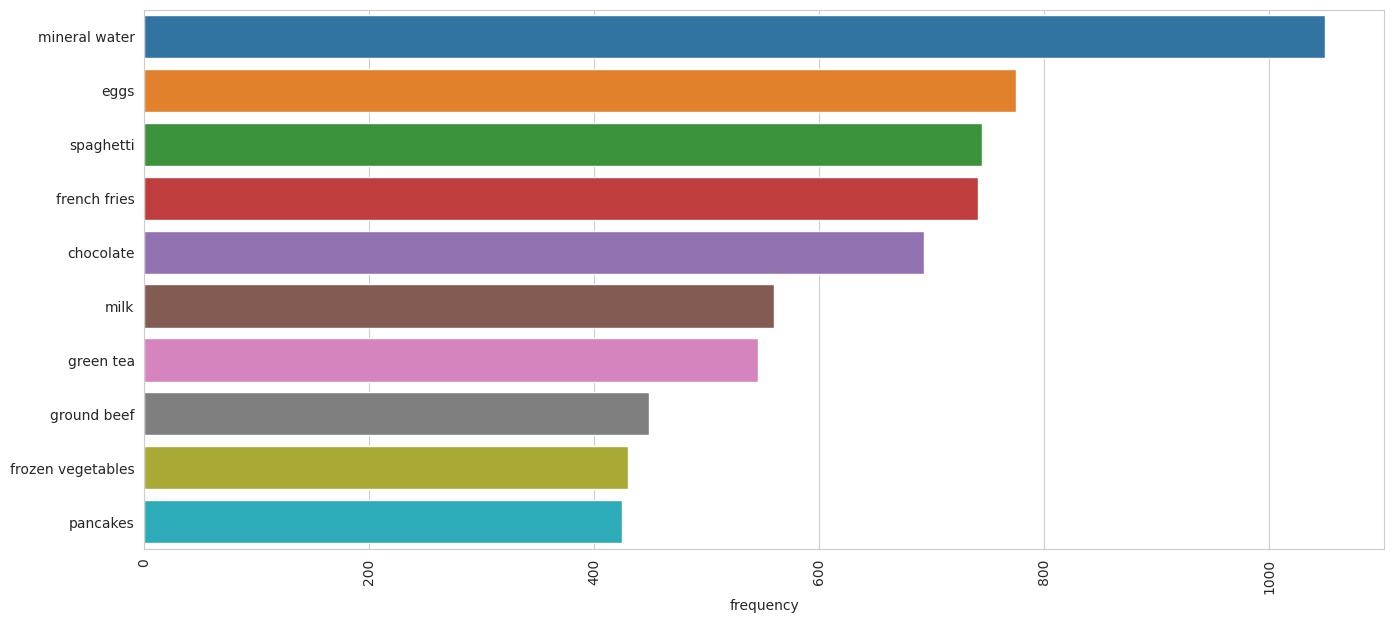

In [7]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
plt.xticks(rotation=90)

In [ ]:
Now for each itemset, we will estimate the support. Remember, the support threshold is something that we decide about. Here, We have taken support threshold as 5%.

In [10]:
apriori(transaction_df, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.088162,(burgers)
1,0.076574,(cake)
2,0.057487,(chicken)
3,0.157464,(chocolate)
4,0.079300,(cookies)
5,0.176096,(eggs)
6,0.079527,(escalope)
7,0.168371,(french fries)
8,0.061577,(frozen smoothie)
9,0.097705,(frozen vegetables)


Our store has 118 items but using 5% as Support Threshold means we are looking at 24 elements in the above code cell that are present in atleast 310 transactions out of the 3100 transacions in the dataset. The store owner wants to increase their profit and one way of doing that will be to know how to better sell most of the 120 items that are sold by the store.
This can be done by asssuring greater number of items being picked up by the Apriori algorithm. This can be done by lowering the Support Threshold so that we get more number of association rules for a good proportion of the 120 items the store sells.
We can check how many items are there in different range of frequencies. Knowing this will help us to decide about the support as well as confidence threshold percentages that will make proper business sense.

In [11]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 28 items
freq>100: 47 items
freq>50: 71 items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


So, we can assume that if the frquency limit is between 50 and 100, we should get around 50 items, which will cover nearly half the collection of items in the store. This can be achieved by setting the Support Threshold to 3%.

In [12]:
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.030675,(avocado)
1,0.034083,(brownies)
2,0.088162,(burgers)
3,0.030448,(butter)
4,0.076574,(cake)
5,0.046353,(champagne)
6,0.057487,(chicken)
7,0.157464,(chocolate)
8,0.079300,(cookies)
9,0.047716,(cooking oil)


Let's estimate the confidence for the rules that we have generated now. Again, this decision is motivated in light of business aspects and also based on the dataset at hand. This is such a dataset where the variability of the transactions is high, meaning that there are very few associations between items from different transactions, hence, we cannot be very certain about the quality of our association rules for this dataset as any Confidence Threshold above 44% will not produce any rules at all.
In such scenarios, it is preferred to have a considerably large number of rules that covers as many of the items in the store as possible and that can be achieved by reducing the Cnfidence Threshold to a resonable amount, in our case, we have taken it as 10%.
You already know about the Support, Confidence, Lift as Measuring metrics that we used for determining the Association Rules. However, Leverage and Conviction are other metrics that you can explore further later.

In [15]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.10)
overal_association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(chocolate),0.176096,0.157464,0.031129,0.176774,1.122631,0.003400,1.023456,0.132583
1,(chocolate),(eggs),0.157464,0.176096,0.031129,0.197691,1.122631,0.003400,1.026916,0.129651
2,(french fries),(chocolate),0.168371,0.157464,0.033629,0.199730,1.268416,0.007116,1.052815,0.254458
3,(chocolate),(french fries),0.157464,0.168371,0.033629,0.213564,1.268416,0.007116,1.057466,0.251164
4,(mineral water),(chocolate),0.238582,0.157464,0.050898,0.213333,1.354805,0.013329,1.071020,0.343946
5,(chocolate),(mineral water),0.157464,0.238582,0.050898,0.323232,1.354805,0.013329,1.125080,0.310831
6,(chocolate),(spaghetti),0.157464,0.169280,0.035674,0.226551,1.338325,0.009018,1.074047,0.300043
7,(spaghetti),(chocolate),0.169280,0.157464,0.035674,0.210738,1.338325,0.009018,1.067499,0.304311
8,(french fries),(eggs),0.168371,0.176096,0.032265,0.191633,1.088228,0.002616,1.019220,0.097489
9,(eggs),(french fries),0.176096,0.168371,0.032265,0.183226,1.088228,0.002616,1.018187,0.098403
